In [6]:
from libraries import lib
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [8]:
N, J, Gamma = 3, 1, 1

In [9]:
gse = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
gse

np.float64(-4.0)

In [10]:
lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0].full()

array([[-0.61237244+0.j],
       [-0.20412415+0.j],
       [-0.20412415+0.j],
       [-0.20412415+0.j],
       [-0.20412415+0.j],
       [-0.20412415+0.j],
       [-0.20412415+0.j],
       [-0.61237244+0.j]])

In [11]:
input = lib.generate_input_torch(N)
vars = (N, J, Gamma)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
loss_fn = lib.TFIM_expectation_from_torch

In [55]:
model = KAN(width=[N, N, 2], device=device)

checkpoint directory created: ./model
saving model version 0.0


In [56]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(5):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [57]:
calced = loss_data[-1]
actual = gse
print(calced)
print(actual)
print((calced - actual)**2)

-3.9999847412109375
-4.0
2.3283064365386963e-10


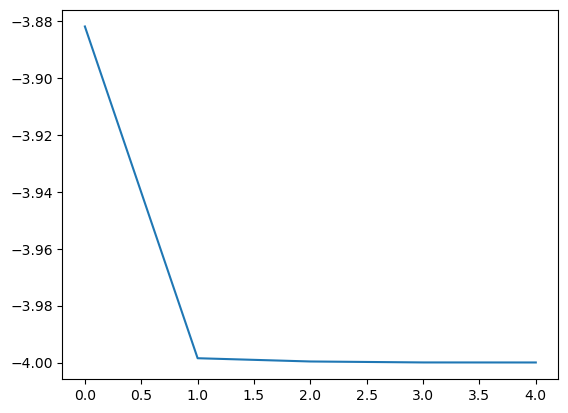

In [58]:
plt.plot(epochs, loss_data)
plt.show()

In [59]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs)
print(actual)
print(qt.fidelity(gs, actual))

Quantum object: dims=[[8], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[-0.53789204-0.29563686j]
 [-0.17937544-0.09757378j]
 [-0.17903996-0.09820419j]
 [-0.1791717 -0.09789595j]
 [-0.17923807-0.09772052j]
 [-0.17909554-0.09772147j]
 [-0.1795166 -0.09712102j]
 [-0.53554654-0.29397318j]]
Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[-0.61237244]
 [-0.20412415]
 [-0.20412415]
 [-0.20412415]
 [-0.20412415]
 [-0.20412415]
 [-0.20412415]
 [-0.61237244]]
0.9999965629892711


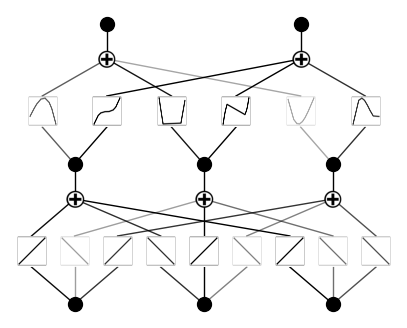

In [60]:
model.plot()

In [61]:
model.auto_symbolic(r2_threshold=0.9)

fixing (0,0,0) with x, r2=0.9999879002571106, c=1
fixing (0,0,1) with x, r2=0.9999051094055176, c=1
fixing (0,0,2) with x, r2=0.9999967813491821, c=1
fixing (0,1,0) with x, r2=0.9999673962593079, c=1
fixing (0,1,1) with x, r2=0.9999998807907104, c=1
fixing (0,1,2) with x, r2=0.999985933303833, c=1
fixing (0,2,0) with x, r2=0.9999977946281433, c=1
fixing (0,2,1) with x, r2=0.9999631643295288, c=1
fixing (0,2,2) with x, r2=0.9999945163726807, c=1
For (1,0,0) the best fit was 0, but r^2 = 0.0 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
For (1,0,1) the best fit was 0, but r^2 = 0.0 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
For (1,1,0) the best fit was 0, but r^2 = 0.0 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
For (1,1,1) the best fit was 0, but r^2 = 0.0 and this is lower than 0.9. This edge was omitted, keep training or try a differen

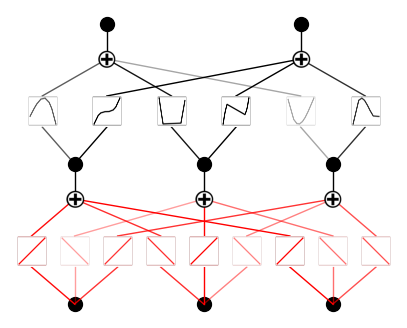

In [62]:
model.plot()

In [63]:
for epoch in range(5):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

In [64]:
calced = loss_fn(model(input), vars, amp_phase).item()
actual = gse
print(calced)
print(actual)
print((calced - actual)**2)

-3.9999847412109375
-4.0
2.3283064365386963e-10


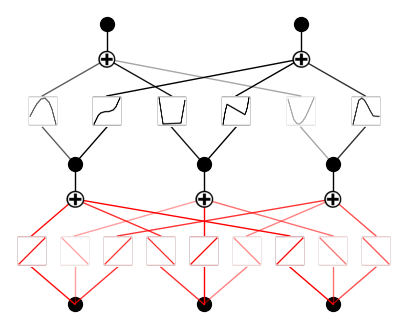

In [65]:
model.plot()

In [66]:
model.suggest_symbolic(1, 2, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      x^2    0.950684 -4.341499           2                2    0.731700
2        x    0.031356 -0.045946           1                1    0.790811
3      sin    0.849794 -2.734894           2                2    1.053021
4      cos    0.849794 -2.734893           2                2    1.053021


In [67]:
model.fix_symbolic(1, 0, 0, 'x^2')
model.fix_symbolic(1, 1, 0, 'x^2')
model.fix_symbolic(1, 2, 0, 'x^2');

r2 is 0.9666484594345093
saving model version 0.2
r2 is 0.9933050870895386
saving model version 0.3
r2 is 0.9506837129592896
saving model version 0.4


In [68]:
for epoch in range(5):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

In [69]:
calced = loss_fn(model(input), vars, amp_phase).item()
actual = gse
print(calced)
print(actual)
print((calced - actual)**2)

-3.9999868869781494
-4.0
1.7195134205394424e-10


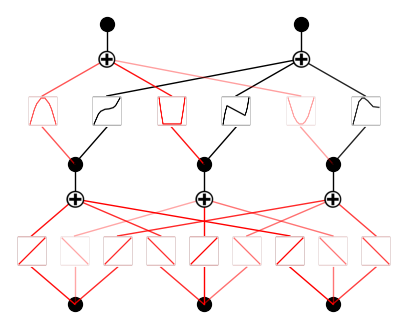

In [70]:
model.plot()

In [71]:
nsimplify(ex_round(model.symbolic_formula()[0][0], 2))

10*(-x_1 + 40*x_2/77 + 15*x_3/19 - 4/25)**2/999 - (-9*x_1/20 + 9*x_2/31 - x_3 + 29/50)**2/25 + (4*x_1/57 - x_2 + 11*x_3/100 + 16/39)**2/3 - 11/100

In [73]:
nsimplify(ex_round(model.symbolic_formula()[0][1], 2))

2/25

In [105]:
N = 5
vars = (N, J, Gamma)
input = lib.generate_input_torch(N)
model = KAN(width = [N, N, 2], device = device)

checkpoint directory created: ./model
saving model version 0.0


In [106]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(10):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [107]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-6.468422889709473
-6.472135954999574
1.3786853848557462e-05


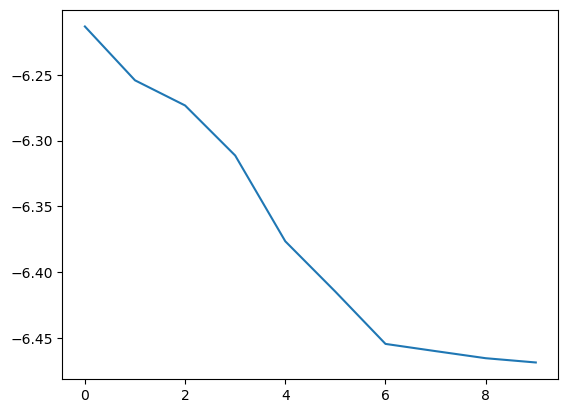

In [108]:
plt.plot(epochs, loss_data)
plt.show()

In [109]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(qt.fidelity(gs, actual))

0.9994130390722843


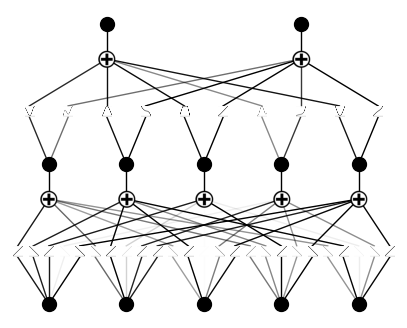

In [110]:
model.plot()

In [111]:
for i in range(N):
    for j in range(N):
        model.fix_symbolic(0, i, j, 'x');

r2 is 1.0000005960464478
saving model version 0.1
Best value at boundary.
r2 is 1.0
saving model version 0.2
r2 is 0.9999999403953552
saving model version 0.3
Best value at boundary.
r2 is 0.9999840259552002
saving model version 0.4
Best value at boundary.
r2 is 1.0000003576278687
saving model version 0.5
r2 is 1.0000004768371582
saving model version 0.6
r2 is 1.0000004768371582
saving model version 0.7
Best value at boundary.
r2 is 0.999951958656311
saving model version 0.8
r2 is 1.0000005960464478
saving model version 0.9
r2 is 0.9999995231628418
saving model version 0.10
Best value at boundary.
r2 is 0.9999998211860657
saving model version 0.11
Best value at boundary.
r2 is 1.0000003576278687
saving model version 0.12
Best value at boundary.
r2 is 0.9863162040710449
saving model version 0.13
r2 is 1.0000005960464478
saving model version 0.14
r2 is 1.0000001192092896
saving model version 0.15
r2 is 1.0000003576278687
saving model version 0.16
r2 is 0.9999968409538269
saving model ver

In [112]:
for i in range(N):
    model.suggest_symbolic(1, i, 0);
    print()

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      sin    0.989228 -6.535217           2                2    0.292957
2      cos    0.989228 -6.535201           2                2    0.292960
3        x    0.079839 -0.120027           1                1    0.775995
4      x^2    0.916599 -3.583615           2                2    0.883277

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      sin    0.998539 -9.408725           2                2   -0.281745
1      cos    0.998539 -9.408666           2                2   -0.281733
2        0    0.000000  0.000014           0                0    0.000003
3      x^2    0.963977 -4.794553           2                2    0.641089
4        x    0.018957 -0.027597           1                1    0.794481

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014    

In [113]:
for i in range(N):
    model.fix_symbolic(1, i, 0, 'sin');

r2 is 0.9892278909683228
saving model version 0.26
r2 is 0.9985387325286865
saving model version 0.27
r2 is 0.9844687581062317
saving model version 0.28
r2 is 0.9736981987953186
saving model version 0.29
r2 is 0.9978912472724915
saving model version 0.30


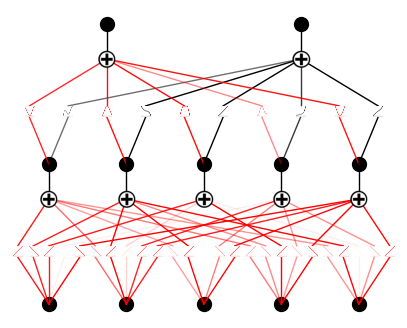

In [114]:
model.plot()

In [115]:
for epoch in range(10):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [117]:
calced = loss_fn(model(input), vars, amp_phase).item()
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-6.471037864685059
-6.472135954999574
1.205802338833161e-06


In [118]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(qt.fidelity(gs, actual))

0.9995618055192116


In [122]:
nsimplify(ex_round(model.symbolic_formula()[0][0], 2))

20*sin(-440*x_1/193 + 6*x_2/5 + 47*x_3/77 - 4*x_4/5 + 29*x_5/50 + 425/84)/999 - sin(-21*x_1/20 + 9*x_2/25 + 17*x_3/25 - 784*x_4/537 + 10*x_5/13 + 48/25)/25 + 10*sin(x_1/5 - 961*x_2/281 + 853*x_3/517 + 515*x_4/444 + 21*x_5/20 + 377/50)/999 - 3*sin(2*x_1/3 + x_2/10 - 3*x_3/100 + 128*x_4/51 - 2*x_5/25 - 809/256)/50 - sin(29*x_1/42 - 661*x_2/421 - 385*x_3/277 + 3*x_4/20 - 21*x_5/20 + 20/999)/25 - 20/999

In [126]:
nsimplify(ex_round(model.symbolic_formula()[0][1], 2))

0

In [127]:
N = 8
vars = (N, J, Gamma)
input = lib.generate_input_torch(N)
model = KAN(width = [N, N, 2], device = device)

checkpoint directory created: ./model
saving model version 0.0


In [128]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(20):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [129]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-10.020028114318848
-10.251661790966022
0.05365416015708769


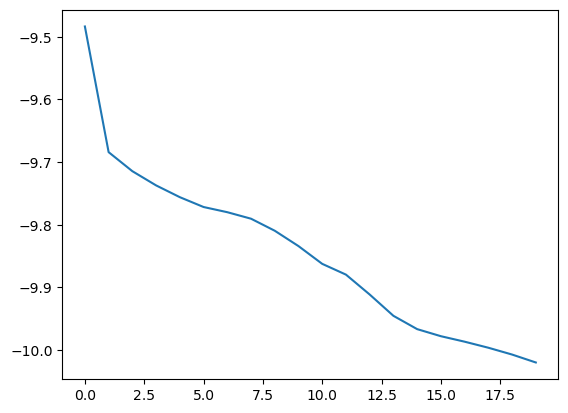

In [130]:
plt.plot(epochs, loss_data)
plt.show()

In [131]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(qt.fidelity(gs, actual))

0.9768794450383895


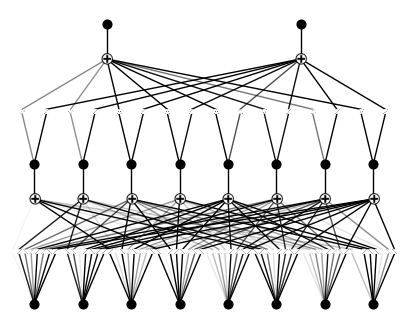

In [132]:
model.plot()

In [135]:
for i in range(N):
    for j in range(N):
        model.fix_symbolic(0, i, j, 'x');

Best value at boundary.
r2 is 0.9999983310699463
saving model version 0.1
r2 is 1.000001072883606
saving model version 0.2
Best value at boundary.
r2 is 1.0000009536743164
saving model version 0.3
Best value at boundary.
r2 is 1.0000007152557373
saving model version 0.4
r2 is 1.000001072883606
saving model version 0.5
r2 is 1.000001072883606
saving model version 0.6
r2 is 1.000001072883606
saving model version 0.7
r2 is 1.0000008344650269
saving model version 0.8
Best value at boundary.
r2 is 0.9966716766357422
saving model version 0.9
r2 is 1.0000009536743164
saving model version 0.10
r2 is 1.0000008344650269
saving model version 0.11
Best value at boundary.
r2 is 0.999992311000824
saving model version 0.12
r2 is 1.000001072883606
saving model version 0.13
r2 is 1.000001072883606
saving model version 0.14
r2 is 1.0000011920928955
saving model version 0.15
r2 is 1.000001072883606
saving model version 0.16
r2 is 1.000001072883606
saving model version 0.17
r2 is 1.0000009536743164
saving

In [136]:
for i in range(N):
    model.suggest_symbolic(1, i, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.216121 -0.351278           1                1    0.729744
2      cos    0.910943 -3.488969           2                2    0.902206
3      sin    0.910943 -3.488967           2                2    0.902207
4      x^2    0.909582 -3.467083           2                2    0.906583
  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.061735 -0.091917           1                1    0.781617
2      cos    0.927218 -3.780077           2                2    0.843985
3      sin    0.927218 -3.780074           2                2    0.843985
4    1/x^2    0.364538 -0.654100           2                2    1.469180
   function  fitting r2    r2 loss  complexity  complexity loss  total loss
0       cos    0.999696 -11.638119  

In [137]:
for i in range(N):
    model.fix_symbolic(1, i, 0, 'cos');

r2 is 0.9109432101249695
saving model version 0.65
r2 is 0.9272180199623108
saving model version 0.66
r2 is 0.9996962547302246
saving model version 0.67
r2 is 0.9999741315841675
saving model version 0.68
r2 is 0.9993559122085571
saving model version 0.69
r2 is 0.9995744824409485
saving model version 0.70
r2 is 0.9955441355705261
saving model version 0.71
r2 is 0.999182939529419
saving model version 0.72


In [139]:
for epoch in range(10):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [140]:
calced = loss_fn(model(input), vars, amp_phase).item()
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-10.054423332214355
-10.251661790966022
0.03890300961073283


In [141]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(qt.fidelity(gs, actual))

0.9837559308495668


In [145]:
nsimplify(ex_round(model.symbolic_formula()[0][0], 2))

-cos(4*x_1/7 - 656*x_2/333 - x_3/3 + 33*x_5/50 + 44*x_6/53 + 27*x_7/50 - 3*x_8/13 + 81/13)/25 + 3*cos(26*x_1/261 + 10*x_2/999 + x_3/10 + 784*x_4/281 - 20*x_5/999 + 3*x_6/50 + 3*x_7/25 - 277*x_8/100 - 15/79)/20 - 9*cos(3*x_1/20 + 11*x_2/50 + 9*x_3/10 - 460*x_4/179 + 10*x_5/77 + 7*x_6/50 + 10*x_7/77 - 240*x_8/103 - 586/383)/50 + 9*cos(11*x_1/20 + 21*x_2/20 - 535*x_3/256 - 553*x_4/512 + 26*x_5/51 + 23*x_6/39 + 9*x_7/20 - 50*x_8/51 - 579/100)/50 - 13*cos(3*x_1/5 - 3*x_2/5 + 10*x_3/999 + 7*x_4/50 + 12*x_5/25 + 11*x_6/25 + 9*x_7/29 - 2*x_8/25 - 682/179)/261 - 9*cos(16*x_1/25 + 681*x_2/512 - 661*x_3/421 - 21*x_4/25 + 29*x_5/50 + 7*x_6/10 + 40*x_7/77 - 32*x_8/41 + 611/102)/53 - 20/999

In [143]:
nsimplify(ex_round(model.symbolic_formula()[0][1], 2))

0